<a href="https://colab.research.google.com/github/Shriansh16/NLP/blob/main/fake_news_classifier_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip '/content/train.csv.zip'

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('/content/train.csv')

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


1: unreliable                              
0: reliable

In [6]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.reset_index(drop=True,inplace=True)

In [11]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


<Axes: >

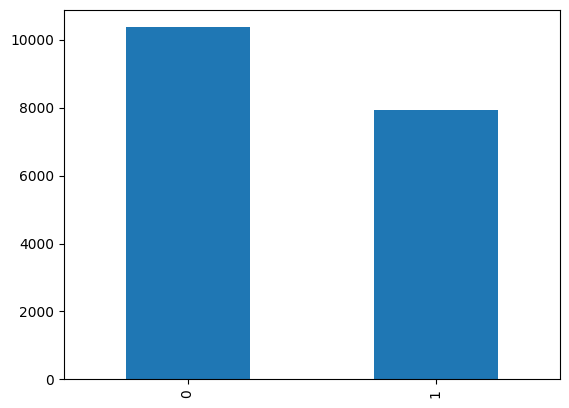

In [12]:
df['label'].value_counts().plot(kind='bar')

In [14]:
df.shape

(18285, 5)

In [18]:
df.drop('id',axis=1,inplace=True)

In [21]:
X=df.drop('label',axis=1)

In [22]:
X.shape

(18285, 3)

In [23]:
y=df['label']

In [24]:
y.shape

(18285,)

In [25]:
import tensorflow as tf


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
voc_size=5000

In [28]:
headline=X['title']

In [29]:
headline[2]

'Why the Truth Might Get You Fired'

In [30]:
import nltk
from nltk.corpus import stopwords

In [35]:
import re

In [33]:
from nltk.stem.porter import PorterStemmer

In [34]:
pstem=PorterStemmer()

In [43]:
def preprocess_text(text):
  text=re.sub('[^A-Za-z]',' ',text)
  text=text.lower()
  words=nltk.word_tokenize(text)
  words=[pstem.stem(word) for word in words if word not in stopwords.words('english')]
  return ' '.join(words)

In [44]:
headline=headline.apply(preprocess_text)

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [50]:
headline=headline.tolist()

In [51]:
one_hot_repr=[one_hot(words,voc_size) for words in headline]

In [52]:
one_hot_repr

[[2966, 2918, 4259, 3399, 1390, 2434, 2809, 2705, 2045, 82],
 [1094, 72, 639, 2147, 4055, 3748, 474],
 [1832, 1206, 541, 1182],
 [4582, 4241, 3728, 3689, 4656, 3138],
 [3373, 4055, 4919, 538, 1590, 4406, 4055, 2947, 1501, 1091],
 [1295,
  4936,
  4535,
  4819,
  1918,
  449,
  678,
  12,
  2797,
  2612,
  4567,
  1353,
  4025,
  3352,
  474],
 [2497, 1683, 1624, 4250, 2671, 45, 2613, 3123, 735, 695, 1978],
 [2819, 4147, 1369, 678, 628, 3954, 449, 1652, 735, 695, 1978],
 [2439, 4253, 3821, 442, 2187, 3095, 1880, 558, 449, 2560],
 [1037, 209, 230, 2309, 3635, 4671, 3902, 298],
 [3353, 2379, 53, 1437, 2540, 3017, 1139, 3204, 633, 2738, 4924],
 [3689, 455, 1390, 3095, 449, 628],
 [2055, 4862, 2771, 2047, 338, 2033, 3977, 2683, 2469],
 [3780, 2087, 3307, 813, 4143, 3734, 4056, 735, 695, 1978],
 [1071, 2787, 4954, 263, 3102, 735, 695, 1978],
 [4102, 4651, 4151, 2800, 2774, 1288, 3517, 1308, 1528, 2878],
 [3035, 437, 72],
 [4808, 397, 3230, 4626, 449, 3727, 4949, 474],
 [4283, 2809, 639, 1171

In [53]:
headline[1]

'flynn hillari clinton big woman campu breitbart'

In [54]:
one_hot_repr[1]

[1094, 72, 639, 2147, 4055, 3748, 474]

##APPLYING PADDING

In [58]:
sent_len=20
embedded_sen=pad_sequences(one_hot_repr,padding='pre',maxlen=sent_len)

In [59]:
embedded_sen

array([[   0,    0,    0, ..., 2705, 2045,   82],
       [   0,    0,    0, ..., 4055, 3748,  474],
       [   0,    0,    0, ..., 1206,  541, 1182],
       ...,
       [   0,    0,    0, ...,  735,  695, 1978],
       [   0,    0,    0, ..., 2834, 3669, 2612],
       [   0,    0,    0, ..., 4657, 3063,   79]], dtype=int32)

In [61]:
embedded_sen[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2966,
       2918, 4259, 3399, 1390, 2434, 2809, 2705, 2045,   82], dtype=int32)

In [62]:
one_hot_repr[0]

[2966, 2918, 4259, 3399, 1390, 2434, 2809, 2705, 2045, 82]

In [63]:
## Creating model
embedding_vector_features=40 ##features representation
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_len))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In this case, there are 100 units, which means that the LSTM layer has 100 internal memory cells. Increasing the number of units typically increases the model's capacity to learn complex patterns in the data, but it also increases the computational cost and the risk of overfitting, especially if the dataset is small.


 100 specifies the number of units or neurons in the LSTM layer.


In [64]:
import numpy as np

In [65]:
X_final=np.array(embedded_sen)

In [66]:
y_final=np.array(y)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.20,random_state=42)

In [69]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
229/229 [==============================] - 16s 54ms/step - loss: 0.3054 - accuracy: 0.8608 - val_loss: 0.2182 - val_accuracy: 0.9098
Epoch 2/10
229/229 [==============================] - 4s 15ms/step - loss: 0.1355 - accuracy: 0.9467 - val_loss: 0.2070 - val_accuracy: 0.9133
Epoch 3/10
229/229 [==============================] - 2s 11ms/step - loss: 0.1020 - accuracy: 0.9636 - val_loss: 0.2261 - val_accuracy: 0.9103
Epoch 4/10
229/229 [==============================] - 3s 11ms/step - loss: 0.0812 - accuracy: 0.9707 - val_loss: 0.2673 - val_accuracy: 0.9130
Epoch 5/10
229/229 [==============================] - 2s 9ms/step - loss: 0.0627 - accuracy: 0.9785 - val_loss: 0.3045 - val_accuracy: 0.9076
Epoch 6/10
229/229 [==============================] - 2s 8ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.3498 - val_accuracy: 0.9095
Epoch 7/10
229/229 [==============================] - 2s 7ms/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.4012 - val_accuracy: 0.9133
E

In [70]:
y_pred=model.predict(X_test)

115/115 [==============================] - 1s 2ms/step


In [71]:
y_pred=np.where(y_pred>0.5,1,0)    # 0.5 is threshold which is selected by the AUC ROC concept

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_test,y_pred)

0.9051134809953514